### Assignment 3

#### Task 1 (7 points):

* Download the data (*sonar.all-data*) from the *Sonar, Mines vs. Rocks Data Set*: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.
* Plot a ROC curve. Comment your results.

In [ ]:
! git commit -am "initial code"

In [77]:
! git push

To https://github.com/AlexTouvras/Evaluation-Improvement
   b79c38f..da3b0b5  main -> main


In [3]:
import pandas as pd
import numpy as np

# Put the dataset into a dataframe
sonar_data =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", header=None)

# Descriptive statistics of the DataFrame for the first 10 features
sonar_data.describe().transpose().head(10)

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [26]:
# Substitute R with 0 and M with 1 
for col in range(len(sonar_data.columns)):
    sonar_data.loc[(sonar_data[col] == 'R')  ,col] = 0
    sonar_data.loc[(sonar_data[col] == 'M') ,col] = 1
X = sonar_data.iloc[: , :59]
y = sonar_data[60].astype(str).astype(int)

In [51]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 2, 2.1 ,2.2, 2.3, 2.5, 2.7, 5, 7, 10],
              'gamma': [0.001, 0.01, 0.1, 0.2, 0.5, 0.7, 1, 2, 2.1, 2.2, 2.5, 2.7, 5]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 2.1, 2.2, 2.3, 2.5, 2.7,
                               5, 7, 10],
                         'gamma': [0.001, 0.01, 0.1, 0.2, 0.5, 0.7, 1, 2, 2.1,
                                   2.2, 2.5, 2.7, 5]})

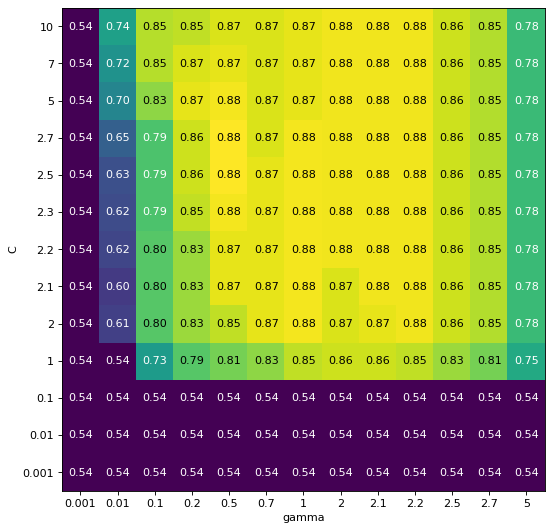

In [52]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), dpi=80)
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(13, 13)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [53]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.81
Best parameters: {'C': 2.5, 'gamma': 0.5}
Best cross-validation score: 0.88

Best estimator:
SVC(C=2.5, gamma=0.5)


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier


svc = SVC(C=2.5, gamma=.5).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))

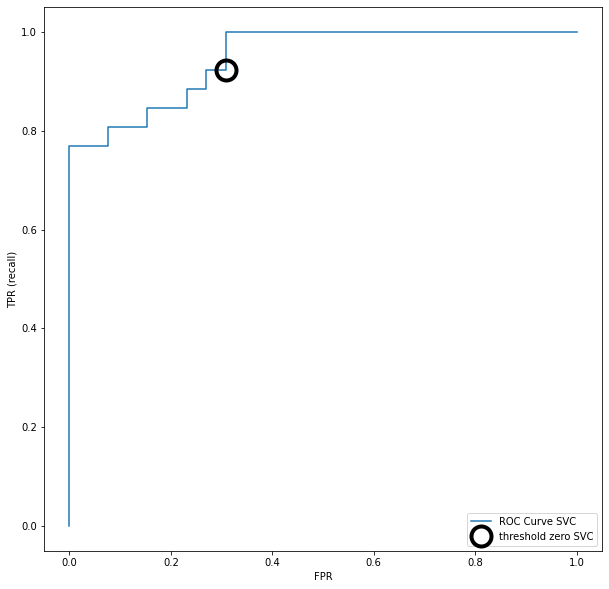

In [69]:
from sklearn.metrics import roc_curve
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['lines.markersize'] = 20
def plot_roc_curve():
    fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
    close_zero = np.argmin(np.abs(thresholds))

    plt.plot(fpr, tpr, label="ROC Curve SVC")

    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', 
    label="threshold zero SVC", fillstyle="none", c='k', mew=4)
    
    plt.legend(loc=4)
plot_roc_curve()

In [71]:
from sklearn.metrics import roc_auc_score
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for SVC: 0.948


#### Task 2 (8 points):

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the *Cardiotocography Data Set*: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the *morphologic pattern* and the other the *fetal state*. 
* Comment on the time and preformance metrics used in each model.

In [41]:
# Put the dataset into a dataframe
sonar_data =  pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls", sheet_name='Data', usecols='K:AE,AR,AT', header=1, skiprows =[2128,2129,2130])

# Descriptive statistics of the DataFrame for the first 10 features
sonar_data.dtypes

LB            int64
AC.1        float64
FM.1        float64
UC.1        float64
DL.1        float64
DS.1        float64
DP.1        float64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
CLASS         int64
NSP           int64
dtype: object